In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


**Central Tendency**

In [4]:
df[['Height', 'Weight']] =df[['Height', 'Weight']].astype(int)
df.head()

,Gender,Height,Weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206


In [6]:
print(df['Height'].mean())
print(df['Height'].median())
print(df['Height'].mode()[0])

65.8662
66.0
67


In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,65.866200,160.937700
std,3.860283,32.108169
min,54.000000,64.000000
25%,63.000000,135.000000
50%,66.000000,161.000000
75%,69.000000,187.000000
max,78.000000,269.000000


dari data diatas dapat kita lihat bahwa nilai mean, median, dan mode cenderung berdekatan, maka ada kemungkinan terdistribusi normal

In [10]:
def print_skewness(data):
    print(f'\'{data.name}\' skewness: {data.skew()}')
    print(f'\'{data.name}\' kurtosis: {data.kurt()}')
    if data.skew()> 0.5:
        print('right skewed')
    elif data.skew() < -0.5:
        print('left skewed')
    else:
        print('normal distribution')

In [35]:
from scipy.stats import norm

#fungsi untuk visualisasi
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=25, rwidth=1, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Count')

    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng, data.mean(), data.std()))
    plt.axvline(data.mean(), color="magenta", linestyle='dashed', linewidth=2) #mean
    plt.axvline(data.median(), color="green", linestyle='dashed', linewidth=2) #median
    plt.axvline(data.mode()[0], color="yellow", linestyle='dashed', linewidth=2) #mode
    
    plt.legend(['Normal Distribution (PDF)', 'Histogram'])
    plt.show()

'Height' skewness: 0.043708363993048636
'Height' kurtosis: -0.47356575433384096
normal distribution


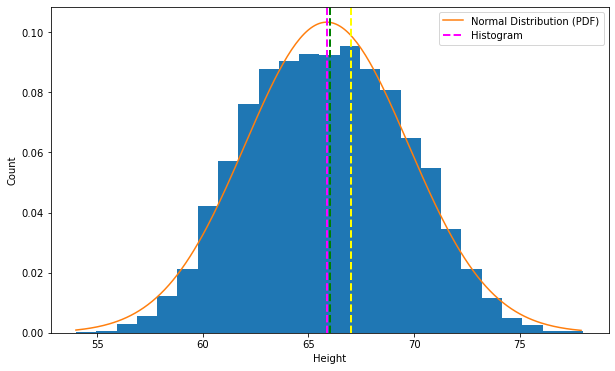

In [36]:
visualize_data(df['Height'])

In [44]:
n, bins= np.histogram(df.Height, bins=20)
for i in range(0, len(n)):
    print(f'Bin Border {i}, range: {bins[i]}, {bins[i+1]}, frekuensi:  {n[i]}')

Bin Border 0, range: 54.0, 55.2, frekuensi:  10
Bin Border 1, range: 55.2, 56.4, frekuensi:  27
Bin Border 2, range: 56.4, 57.6, frekuensi:  54
Bin Border 3, range: 57.6, 58.8, frekuensi:  118
Bin Border 4, range: 58.8, 60.0, frekuensi:  204
Bin Border 5, range: 60.0, 61.2, frekuensi:  955
Bin Border 6, range: 61.2, 62.4, frekuensi:  732
Bin Border 7, range: 62.4, 63.6, frekuensi:  842
Bin Border 8, range: 63.6, 64.8, frekuensi:  868
Bin Border 9, range: 64.8, 66.0, frekuensi:  890
Bin Border 10, range: 66.0, 67.2, frekuensi:  1802
Bin Border 11, range: 67.2, 68.4, frekuensi:  844
Bin Border 12, range: 68.4, 69.6, frekuensi:  776
Bin Border 13, range: 69.6, 70.8, frekuensi:  623
Bin Border 14, range: 70.8, 72.0, frekuensi:  526
Bin Border 15, range: 72.0, 73.2, frekuensi:  533
Bin Border 16, range: 73.2, 74.4, frekuensi:  111
Bin Border 17, range: 74.4, 75.6, frekuensi:  47
Bin Border 18, range: 75.6, 76.8, frekuensi:  26
Bin Border 19, range: 76.8, 78.0, frekuensi:  12


In [42]:
print(n)

[  10   27   54  118  204  955  732  842  868  890 1802  844  776  623
  526  533  111   47   26   12]


In [43]:
print(bins)

[54.  55.2 56.4 57.6 58.8 60.  61.2 62.4 63.6 64.8 66.  67.2 68.4 69.6
 70.8 72.  73.2 74.4 75.6 76.8 78. ]


**Outlier bedasarkan std**

In [45]:
df.Height.var()

14.901787738773884

In [46]:
df.Height.std()

3.8602833754497716

In [50]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.44705012634932

In [51]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.28534987365069

In [54]:
#Outlier
outlier_std = df[(df.Height <= upper_limit) & (df.Height >= lower_limit)]
outlier_std

,Gender,Height,Weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206
...,...,...,...
9995,Female,66,136
9996,Female,67,170
9997,Female,63,128
9998,Female,69,163
